**AlexNet Architecture**

**Importing the modules**

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

**Define the model**

In [3]:
class AlexNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(AlexNet, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels, 96, kernel_size=11, stride=4, padding=2)
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 6 * 6, 4069)
        self.fc2 = nn.Linear(4069, 4069)
        self.fc3 = nn.Linear(4069, num_classes)

        # Other
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.norm = nn.LocalResponseNorm(size=5, k=2)
        self.droput = nn.Dropout(0.5)
        self.relu = nn.ReLU()

        # Initialize the weights
        self._init_weights()

    def forward(self, x):
        x = self.maxpool(self.norm(self.relu(self.conv1(x))))  # (B, 96, 27, 27)
        x = self.maxpool(self.norm(self.relu(self.conv2(x))))  # (B, 256, 13, 13)
        x = self.relu(self.conv3(x))                           # (B, 384, 13, 13)
        x = self.relu(self.conv4(x))                           # (B, 384, 13, 13)
        x = self.maxpool(self.relu(self.conv5(x)))             # (B, 256, 6, 6)
        x = self.flatten(x)                                    # (B, 9216)
        x = self.droput(self.relu(self.fc1(x)))                # (B, 4096)
        x = self.droput(self.relu(self.fc2(x)))                # (B, 4096)
        x = self.fc3(x)                                        # (B, num_classes)
        return x

    def _init_weights(self):
        bias_1 = [1, 3, 4, 5, 6, 7] # Layers with bias initialized with 1

        for i, layer in enumerate(self.modules()):
            if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
                if i in bias_1:
                    # Initialize bias with 1
                    nn.init.constant_(layer.bias, 1)
                else:
                    # Initialize bias with 0
                    nn.init.constant_(layer.bias, 0)

                # Initialize the weights from a zero-mean Gaussian
                # distributition with std=0.01
                nn.init.normal_(layer.weight, mean=0, std=0.01)

**Training the model and displaying the size of the model**

In [4]:
x = torch.randn(64, 3, 227, 227)
model = AlexNet(x.shape[1], 1000)
print(model(x).shape)

torch.Size([64, 1000])


**AlexNet**

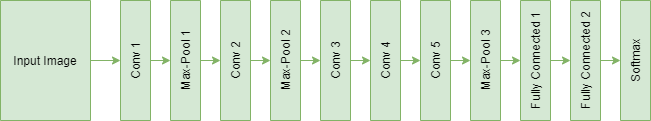